# Scraping and Pre-processing IMDB Reviews

Importing the necessary libraries

In [24]:
import pandas as pd
import numpy as np

from selenium import webdriver
from selenium.webdriver.common.by import By
import time

import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

## **Data Extraction**

We will scrape through IMDB's official websites:
*   Mostly positive and neutral Reviews - Top rated 250 movies
*   Mostly negative and neutral Reviews - Lowest rated rated movies


First, we will use selenium to get the Titles of the Movie, Release Year, and link to the IMDB website of the movie.<br>
Second, we will use selenium and beautiful soup visit the IMDB website of each movie and get the user reviews link.<br>
Lastly, we will scrape through the user review links for each movie, and collect review title, review content, review date.

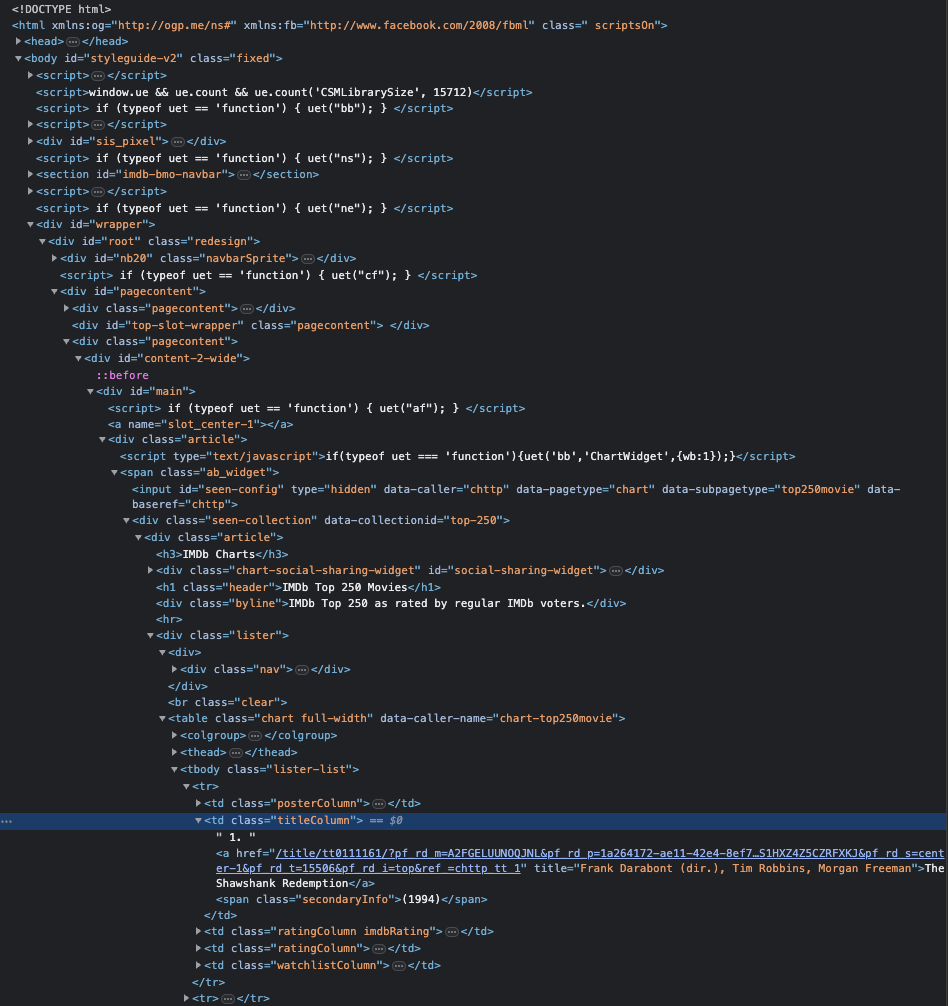

In [2]:
driver = webdriver.Chrome('chromedriver.exe')

##### Getting Title, Release Year, IMDB links for Top 250 movies #####
top250 = 'https://www.imdb.com/chart/top?sort=rk,asc&mode=simple&page=1'
lowest_rated = 'https://www.imdb.com/chart/bottom?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=470df400-70d9-4f35-bb05-8646a1195842&pf_rd_r=ENR4DFHPJPJN26MKMQME&pf_rd_s=right-4&pf_rd_t=15506&pf_rd_i=top&ref_=chttp_ql_8'

movie_titles_step1 = []
movie_release_year_step1 = []
movie_imdb_detail_link = []

def chart_crawler(page):
    driver.get(page)
    titles_iterator = driver.find_elements(By.CLASS_NAME,'titleColumn')
    for i in range(0,100):
        title = titles_iterator[i].text
        movie_release_year_step1.append(title[-5:-1])

        movie_titles_step1.append(title[3:-7])

        if title[1]=='.':
            link = titles_iterator[i].find_element(By.LINK_TEXT,title[3:-7]).get_attribute('href')
        elif title[2]=='.':
            link = titles_iterator[i].find_element(By.LINK_TEXT,title[4:-7]).get_attribute('href')
        else:
            link = titles_iterator[i].find_element(By.LINK_TEXT,title[5:-7]).get_attribute('href')

        movie_imdb_detail_link.append(link)

chart_crawler(top250)
chart_crawler(lowest_rated)

driver.close()

print(movie_titles_step1)
print(movie_release_year_step1)
print(movie_imdb_detail_link)

/var/folders/f2/vwnrq6v53w7__2n4q911qbtm0000gn/T/ipykernel_1955/4135072097.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('chromedriver.exe')


['The Shawshank Redemption', 'The Godfather', 'The Dark Knight', 'The Godfather Part II', '12 Angry Men', "Schindler's List", 'The Lord of the Rings: The Return of the King', 'Pulp Fiction', 'The Lord of the Rings: The Fellowship of the Ring', ' The Good, the Bad and the Ugly', ' Forrest Gump', ' Fight Club', ' The Lord of the Rings: The Two Towers', ' Inception', ' Star Wars: Episode V - The Empire Strikes Back', ' The Matrix', ' Goodfellas', " One Flew Over the Cuckoo's Nest", ' Se7en', " It's a Wonderful Life", ' Seven Samurai', ' The Silence of the Lambs', ' Saving Private Ryan', ' City of God', ' Interstellar', ' Life Is Beautiful', ' The Green Mile', ' Star Wars: Episode IV - A New Hope', ' Terminator 2: Judgment Day', ' Back to the Future', ' Spirited Away', ' The Pianist', ' Psycho', ' Parasite', ' Léon: The Professional', ' The Lion King', ' Gladiator', ' American History X', ' The Departed', ' Whiplash', ' The Prestige', ' The Usual Suspects', ' Casablanca', ' Grave of the Fi

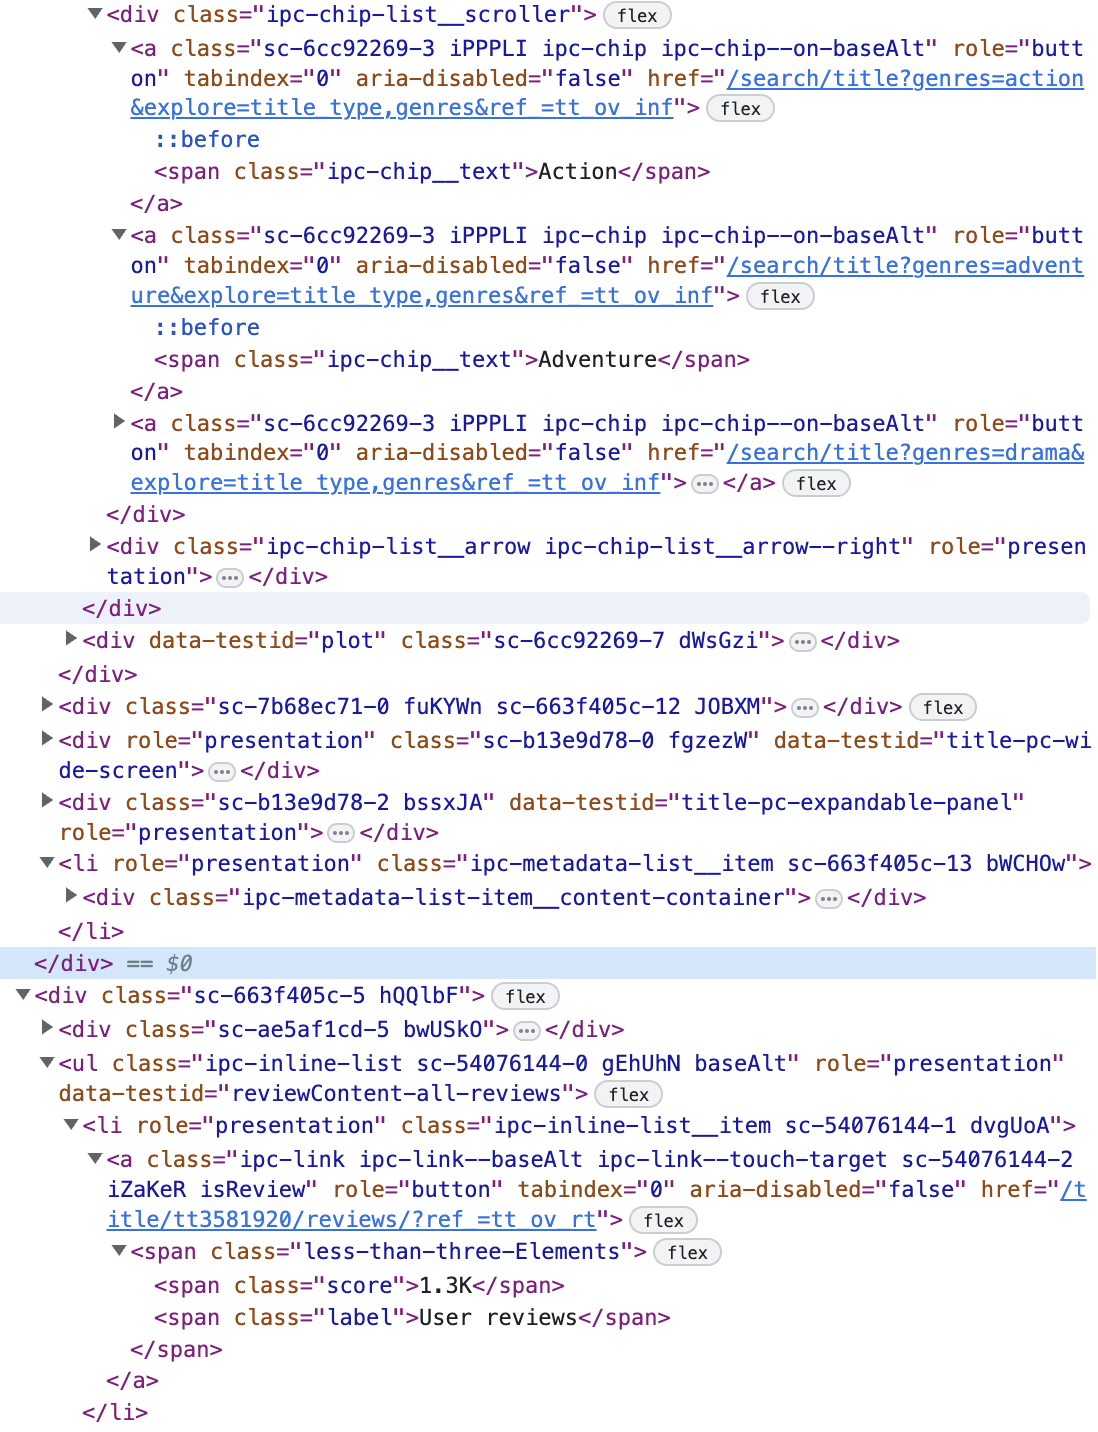

In [ ]:
##### Visit IMDB movie pages and collect genre and user review link #####
driver = webdriver.Chrome('chromedriver.exe')

user_reviews_links = []
movie_genres_step2 = []

for i in movie_imdb_detail_link:
    driver.get(i)

    genre = []
    genre_iterator = driver.find_elements(By.CLASS_NAME,'ipc-chip__text')
    review_link_section = driver.find_element(By.LINK_TEXT,"User reviews")

    for i in genre_iterator:
        genre.append(i.text)

    movie_genres_step2.append(genre[:-1])

    link = review_link_section.get_attribute('href')

    user_reviews_links.append(link)

driver.close()
print(user_reviews_links)
print(movie_genres_step2)

In [280]:
##### Visit IMDB user review page for each movie and collect review date, review titles, review content #####
movie_title = []
movie_release_year = []
movie_genre = []
review_user = []
review_rating = []
review_title = []
review_date = []
review_content = []

driver = webdriver.Chrome('chromedriver.exe')

for i in range(0,200):
    driver.get(user_reviews_links[i])
    
    counter = 0
    while counter < 3:
        try:
            time.sleep(2)
            load_more_button = driver.find_element(By.ID,"load-more-trigger")
            load_more_button.click()
            counter += 1
        except:
            counter += 1
            continue

    review_list_iterator = driver.find_elements(By.CLASS_NAME, "lister-item-content")


    for j in range(0,50):
        try:
            arrow_down_button = review_list_iterator[j].find_element(By.CLASS_NAME, "ipl-expander")
            arrow_down_button.click()
        except: 
            continue

    for j in range(0,50):
        try:
            review_rating.append(review_list_iterator[j].find_element(By.CLASS_NAME, "rating-other-user-rating").text)
            movie_title.append(movie_titles_step1[i])
            movie_release_year.append(movie_release_year_step1[i])
            movie_genre.append(movie_genres_step2[i])
            review_user.append(review_list_iterator[j].find_element(By.CLASS_NAME, "display-name-link").text)
            review_title.append(review_list_iterator[j].find_element(By.CLASS_NAME, "title").text)
            review_date.append(review_list_iterator[j].find_element(By.CLASS_NAME, "review-date").text)
            review_content.append(review_list_iterator[j].find_element(By.CLASS_NAME, "content").find_element(By.CLASS_NAME, "text.show-more__control").text)
        except:
            continue
            
driver.close()

/var/folders/f2/vwnrq6v53w7__2n4q911qbtm0000gn/T/ipykernel_2070/2203717302.py:11: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('chromedriver.exe')


Raw Dataset

In [285]:
print(len(movie_title))
print(len(movie_release_year))
print(len(movie_genre))
print(len(review_user))
print(len(review_rating))
print(len(review_title))
print(len(review_date))
print(len(review_content))

8970
8970
8970
8970
8970
8970
8970
8970


In [288]:
imdb_review_dictionary = {
    'Movie_Title': movie_title,
    'Movie_Release_Year': movie_release_year,
    'Movie_Genres': movie_genre,
    'Review_User': review_user,
    'Review_Date': review_date,
    'Review_Rating': review_rating,
    'Review_Title': review_title,
    'Review_Content': review_content
}

imdb_review_rawdata = pd.DataFrame(data = imdb_review_dictionary)
imdb_review_rawdata.to_excel("imdb_rawdata.xlsx")

imdb_review_rawdata.head(13)

,Movie_Title,Movie_Release_Year,Movie_Genres,Review_User,Review_Date:,Review_Rating,Review_Title,Review_Content
0,The Shawshank Redemption,1994,[Drama],hitchcockthelegend,24 July 2010,10/10,Some birds aren't meant to be caged.,The Shawshank Redemption is written and direct...
1,The Shawshank Redemption,1994,[Drama],Sleepin_Dragon,17 February 2021,10/10,An incredible movie. One that lives with you.,It is no wonder that the film has such a high ...
2,The Shawshank Redemption,1994,[Drama],EyeDunno,21 November 2005,10/10,Don't Rent Shawshank.,I'm trying to save you money; this is the last...
3,The Shawshank Redemption,1994,[Drama],alexkolokotronis,18 February 2008,10/10,This is How Movies Should Be Made,This movie is not your ordinary Hollywood flic...
4,The Shawshank Redemption,1994,[Drama],kaspen12,10 February 2006,10/10,A classic piece of unforgettable film-making.,"In its Oscar year, Shawshank Redemption (writt..."
5,The Shawshank Redemption,1994,[Drama],Coxer99,25 March 1999,10/10,The Shawshank Redemption,One of the finest films made in recent years. ...
6,The Shawshank Redemption,1994,[Drama],TheLittleSongbird,17 April 2009,10/10,"Enthralling, fantastic, intriguing, truly rema...",Shawshank Redemption is without doubt one of t...
7,The Shawshank Redemption,1994,[Drama],baumer,13 July 1999,10/10,Stephen King's best adapted movie,Misery and Stand By Me were the best adaptatio...
8,The Shawshank Redemption,1994,[Drama],nowego,15 June 2018,10/10,Eternal Hope,I've lost count of the number of times I have ...
9,The Shawshank Redemption,1994,[Drama],gavin6942,6 November 2014,10/10,IMDb and the Greatest Film of All Time,Two imprisoned men (Tim Robbins and Morgan Fre...


## **Data Preprocessing**

Importing necessary libraries for data processing

In [25]:
data = pd.read_excel("Sentiment Analysis Data/imdb_rawdata.xlsx")
data.head()

,Unnamed: 0,Movie_Title,Movie_Release_Year,Movie_Genres,Review_User,Review_Date,Review_Rating,Review_Title,Review_Content
0,0,The Shawshank Redemption,1994,['Drama'],hitchcockthelegend,24 July 2010,10/10,Some birds aren't meant to be caged.,The Shawshank Redemption is written and direct...
1,1,The Shawshank Redemption,1994,['Drama'],Sleepin_Dragon,17 February 2021,10/10,An incredible movie. One that lives with you.,It is no wonder that the film has such a high ...
2,2,The Shawshank Redemption,1994,['Drama'],EyeDunno,21 November 2005,10/10,Don't Rent Shawshank.,I'm trying to save you money; this is the last...
3,3,The Shawshank Redemption,1994,['Drama'],alexkolokotronis,18 February 2008,10/10,This is How Movies Should Be Made,This movie is not your ordinary Hollywood flic...
4,4,The Shawshank Redemption,1994,['Drama'],kaspen12,10 February 2006,10/10,A classic piece of unforgettable film-making.,"In its Oscar year, Shawshank Redemption (writt..."


* Delete the index column

* Delete rows with missing data

* Rating should not contain the total

* Get the formats of all the columns corrected

* Create a new column that shows sentiment based on user review score

In [26]:
data = data.drop(data.columns[0],axis=1)

data = data.dropna()

for i,j in enumerate(data['Review_Rating']):
    if j[1]=='/':
        data['Review_Rating'][i] = j[0]
    else:
        data['Review_Rating'][i] = 10

data['Movie_Release_Year'] = data['Movie_Release_Year'].astype('int')
data['Review_Date'] = data['Review_Date'].astype('datetime64')
data['Review_Rating'] = data['Review_Rating'].astype('float')

sentiment = []

for i,j in enumerate(data['Review_Rating']):
    if j >= 7:
        sentiment.append('Positive')
    elif j >= 4:
        sentiment.append('Neutral')
    else:
        sentiment.append('Negative')

data['Review_Sentiment'] = sentiment

data.head()


/var/folders/f2/vwnrq6v53w7__2n4q911qbtm0000gn/T/ipykernel_1938/954621849.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Review_Rating'][i] = 10
/var/folders/f2/vwnrq6v53w7__2n4q911qbtm0000gn/T/ipykernel_1938/954621849.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Review_Rating'][i] = j[0]


,Movie_Title,Movie_Release_Year,Movie_Genres,Review_User,Review_Date,Review_Rating,Review_Title,Review_Content,Review_Sentiment
0,The Shawshank Redemption,1994,['Drama'],hitchcockthelegend,2010-07-24,10.0,Some birds aren't meant to be caged.,The Shawshank Redemption is written and direct...,Positive
1,The Shawshank Redemption,1994,['Drama'],Sleepin_Dragon,2021-02-17,10.0,An incredible movie. One that lives with you.,It is no wonder that the film has such a high ...,Positive
2,The Shawshank Redemption,1994,['Drama'],EyeDunno,2005-11-21,10.0,Don't Rent Shawshank.,I'm trying to save you money; this is the last...,Positive
3,The Shawshank Redemption,1994,['Drama'],alexkolokotronis,2008-02-18,10.0,This is How Movies Should Be Made,This movie is not your ordinary Hollywood flic...,Positive
4,The Shawshank Redemption,1994,['Drama'],kaspen12,2006-02-10,10.0,A classic piece of unforgettable film-making.,"In its Oscar year, Shawshank Redemption (writt...",Positive


Review Text Processing

* Delete the "Was this review helpful? Sign in to vote."

* Remove html tags like "br, ahref, or anything between < >"

* Remove punctuation like commas, exclamation marks, etc.

* Remove certain symbols like $, +, and =

* Lowercase everything

* Remove stop words like is, the

* Porter Stemmer

In [27]:
def review_preprocessor(review):
    #Delete the "Was this review helpful? Sign in to vote."
    review = review.replace("Was this review helpful? Sign in to vote.","")

    # Remove zero or more occurrences of anything between "<" and ">" and new line "\n"
    html_capture = re.compile(r'<.*?>|\n')
    review = html_capture.sub(' ', review)

    # Remove punctutation and symbols
    # We basically find only English Word, Space and number characters and join them
    # Convert all characters to lowercase
    all_word_space_num = re.findall(r'[\w\s\d]', review, re.MULTILINE)
    all_word_space_num_lowered = [i.lower() for i in all_word_space_num]
    review = "".join(all_word_space_num_lowered)
    review = review.split(" ")

    #Removing stopwords
    stopwords_set = set(stopwords.words('english'))
    stopwords_set.add("film")
    stopwords_set.add("films")
    stopwords_set.add("movie")
    stopwords_set.add("movies")
    stopwords_set.add("one")

    removed_stopwords = []
    for i in review:
        if i  not in stopwords_set:
            removed_stopwords.append(i)

    #Applying Porter stemmer and joining all the words after removing stopwords
    st = PorterStemmer()
    review = ""
    for i in removed_stopwords:
        temp = st.stem(i)
        review += temp + " "

    return review


def preprocessing_test(review):
    #Preprocessor Testing
    test = all([x.isalnum() or x == ' ' for x in review])
    print(test)


In [28]:
for i,j in enumerate(data['Review_Content']):
    data['Review_Content'][i] = review_preprocessor(j)

data.head(10)
data.to_excel("imdb_processeddata.xlsx")

/var/folders/f2/vwnrq6v53w7__2n4q911qbtm0000gn/T/ipykernel_1938/2586887133.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Review_Content'][i] = review_preprocessor(j)


## **Time Series Data Collection and Processing**

In [43]:
m1 = movie_titles_step1.index('The Dark Knight')
m2 = movie_titles_step1.index(' Interstellar')
m3 = movie_titles_step1.index('The Lord of the Rings: The Fellowship of the Ring')

specialized_movie_titles_step1 = [movie_titles_step1[m1],movie_titles_step1[m2],movie_titles_step1[m3]]
specialized_movie_release_year_step1 = [movie_release_year_step1[m1],movie_release_year_step1[m2],movie_release_year_step1[m3]]
specialized_movie_imdb_detail_link = [movie_imdb_detail_link[m1],movie_imdb_detail_link[m2],movie_imdb_detail_link[m3]]

print(specialized_movie_titles_step1)
print(specialized_movie_release_year_step1)
print(specialized_movie_imdb_detail_link)

['The Dark Knight', ' Interstellar', 'The Lord of the Rings: The Fellowship of the Ring']
['2008', '2014', '2001']
['https://www.imdb.com/title/tt0468569/?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=1a264172-ae11-42e4-8ef7-7fed1973bb8f&pf_rd_r=VRF0Q5N2MA72DE2Y4K1G&pf_rd_s=center-1&pf_rd_t=15506&pf_rd_i=top&ref_=chttp_tt_3', 'https://www.imdb.com/title/tt0816692/?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=1a264172-ae11-42e4-8ef7-7fed1973bb8f&pf_rd_r=VRF0Q5N2MA72DE2Y4K1G&pf_rd_s=center-1&pf_rd_t=15506&pf_rd_i=top&ref_=chttp_tt_25', 'https://www.imdb.com/title/tt0120737/?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=1a264172-ae11-42e4-8ef7-7fed1973bb8f&pf_rd_r=VRF0Q5N2MA72DE2Y4K1G&pf_rd_s=center-1&pf_rd_t=15506&pf_rd_i=top&ref_=chttp_tt_9']


In [44]:
##### Visit IMDB movie pages and collect genre and user review link #####
driver = webdriver.Chrome('chromedriver.exe')

specialized_user_reviews_links = []
specialized_movie_genres_step2 = []

for i in specialized_movie_imdb_detail_link:
    driver.get(i)

    genre = []
    genre_iterator = driver.find_elements(By.CLASS_NAME,'ipc-chip__text')
    review_link_section = driver.find_element(By.LINK_TEXT,"User reviews")

    for i in genre_iterator:
        genre.append(i.text)

    specialized_movie_genres_step2.append(genre[:-1])

    link = review_link_section.get_attribute('href')

    specialized_user_reviews_links.append(link)

driver.close()
print(specialized_user_reviews_links)
print(specialized_movie_genres_step2)

/var/folders/f2/vwnrq6v53w7__2n4q911qbtm0000gn/T/ipykernel_1955/771184250.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('chromedriver.exe')


['https://www.imdb.com/title/tt0468569/reviews/?ref_=tt_ql_2', 'https://www.imdb.com/title/tt0816692/reviews/?ref_=tt_ql_2', 'https://www.imdb.com/title/tt0120737/reviews/?ref_=tt_ql_2']
[['Action', 'Crime', 'Drama'], ['Adventure', 'Drama', 'Sci-Fi'], ['Action', 'Adventure', 'Drama']]


In [30]:
##### Visit IMDB user review page for each movie and collect review date, review titles, review content #####
specialized_movie_title = []
specialized_movie_release_year = []
specialized_movie_genre = []
specialized_review_user = []
specialized_review_rating = []
specialized_review_title = []
specialized_review_date = []
specialized_review_content = []

driver = webdriver.Chrome('chromedriver.exe')

for i in range(0,3):
    driver.get(specialized_user_reviews_links[i])
    
    counter = 0
    while counter < 13:
        try:
            time.sleep(3)
            load_more_button = driver.find_element(By.ID,"load-more-trigger")
            load_more_button.click()
            counter += 1
        except:
            counter += 1
            continue

    review_list_iterator = driver.find_elements(By.CLASS_NAME, "lister-item-content")


    for j in range(0,500):
        try:
            arrow_down_button = review_list_iterator[j].find_element(By.CLASS_NAME, "ipl-expander")
            arrow_down_button.click()
        except: 
            continue

    for j in range(0,500):
        try:
            specialized_review_rating.append(review_list_iterator[j].find_element(By.CLASS_NAME, "rating-other-user-rating").text)
            specialized_movie_title.append(specialized_movie_titles_step1[i])
            specialized_movie_release_year.append(specialized_movie_release_year_step1[i])
            specialized_movie_genre.append(specialized_movie_genres_step2[i])
            specialized_review_user.append(review_list_iterator[j].find_element(By.CLASS_NAME, "display-name-link").text)
            specialized_review_title.append(review_list_iterator[j].find_element(By.CLASS_NAME, "title").text)
            specialized_review_date.append(review_list_iterator[j].find_element(By.CLASS_NAME, "review-date").text)
            specialized_review_content.append(review_list_iterator[j].find_element(By.CLASS_NAME, "content").find_element(By.CLASS_NAME, "text.show-more__control").text)
        except:
            continue
            
driver.close()

/var/folders/f2/vwnrq6v53w7__2n4q911qbtm0000gn/T/ipykernel_1955/2929546964.py:11: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('chromedriver.exe')


In [31]:
print(len(specialized_movie_title))
print(len(specialized_movie_release_year))
print(len(specialized_movie_genre))
print(len(specialized_review_user))
print(len(specialized_review_rating))
print(len(specialized_review_title))
print(len(specialized_review_date))
print(len(specialized_review_content))

935
935
935
935
935
935
935
935


In [32]:
print(specialized_movie_title)

['The Dark Knight', 'The Dark Knight', 'The Dark Knight', 'The Dark Knight', 'The Dark Knight', 'The Dark Knight', 'The Dark Knight', 'The Dark Knight', 'The Dark Knight', 'The Dark Knight', 'The Dark Knight', 'The Dark Knight', 'The Dark Knight', 'The Dark Knight', 'The Dark Knight', 'The Dark Knight', 'The Dark Knight', 'The Dark Knight', 'The Dark Knight', 'The Dark Knight', 'The Dark Knight', 'The Dark Knight', 'The Dark Knight', 'The Dark Knight', 'The Dark Knight', 'The Dark Knight', 'The Dark Knight', 'The Dark Knight', 'The Dark Knight', 'The Dark Knight', 'The Dark Knight', 'The Dark Knight', 'The Dark Knight', 'The Dark Knight', 'The Dark Knight', 'The Dark Knight', 'The Dark Knight', 'The Dark Knight', 'The Dark Knight', 'The Dark Knight', 'The Dark Knight', 'The Dark Knight', 'The Dark Knight', 'The Dark Knight', 'The Dark Knight', 'The Dark Knight', 'The Dark Knight', 'The Dark Knight', 'The Dark Knight', 'The Dark Knight', 'The Dark Knight', 'The Dark Knight', 'The Dark K

In [33]:
imdb_review_dictionary = {
    'Movie_Title': specialized_movie_title,
    'Movie_Release_Year': specialized_movie_release_year,
    'Movie_Genres': specialized_movie_genre,
    'Review_User': specialized_review_user,
    'Review_Date': specialized_review_date,
    'Review_Rating': specialized_review_rating,
    'Review_Title': specialized_review_title,
    'Review_Content': specialized_review_content
}

imdb_review_rawdata = pd.DataFrame(data = imdb_review_dictionary)
imdb_review_rawdata.to_excel("imdb_time_rawdata.xlsx")

imdb_review_rawdata.head(13)

,Movie_Title,Movie_Release_Year,Movie_Genres,Review_User,Review_Date,Review_Rating,Review_Title,Review_Content
0,The Dark Knight,2008,"[Action, Crime, Drama]",Smells_Like_Cheese,20 July 2008,10/10,The Batman of our dreams! So much more than a ...,I got to see The Dark Knight on Wednesday nigh...
1,The Dark Knight,2008,"[Action, Crime, Drama]",dseferaj,17 February 2021,10/10,This town deserves a better class of criminal!,This movie is a work of art. The finest sequel...
2,The Dark Knight,2008,"[Action, Crime, Drama]",littlemartinarocena,24 July 2008,9/10,A Batman Of Shakesperean Proportions,"Dark, yes, complex, ambitious. Christopher Nol..."
3,The Dark Knight,2008,"[Action, Crime, Drama]",filmquestint,20 July 2008,10/10,Heath Ledger's Dark and Brilliant Swan Song,"I couldn't believe ""The Dark knight"" could liv..."
4,The Dark Knight,2008,"[Action, Crime, Drama]",Aegontheconqueror,7 October 2019,10/10,MASTERPIECE,It is just what you want for the best movie. G...
5,The Dark Knight,2008,"[Action, Crime, Drama]",johnnymacbest,7 July 2008,10/10,"Surpasses ""Begins"" in every aspect!!!","Christopher Nolan's second bundle of joy ""The ..."
6,The Dark Knight,2008,"[Action, Crime, Drama]",melwinbauer,22 November 2021,10/10,Best superhero movie of all time,I think that I could wax lyrical but this movi...
7,The Dark Knight,2008,"[Action, Crime, Drama]",kosmasp,14 September 2008,10/10,Watch the IMAX version if you can,I had the pleasure to watch this movie in an I...
8,The Dark Knight,2008,"[Action, Crime, Drama]",redbullrex,22 January 2021,9/10,Heath Ledger,"If someone else acted as Joker, I would give t..."
9,The Dark Knight,2008,"[Action, Crime, Drama]",LoneWolfAndCub,16 July 2008,10/10,The Dark Knight is as good as everyone says an...,I think the big question...or the question eve...


In [34]:
data = pd.read_excel("imdb_time_rawdata.xlsx")
data.head()

,Unnamed: 0,Movie_Title,Movie_Release_Year,Movie_Genres,Review_User,Review_Date,Review_Rating,Review_Title,Review_Content
0,0,The Dark Knight,2008,"['Action', 'Crime', 'Drama']",Smells_Like_Cheese,20 July 2008,10/10,The Batman of our dreams! So much more than a ...,I got to see The Dark Knight on Wednesday nigh...
1,1,The Dark Knight,2008,"['Action', 'Crime', 'Drama']",dseferaj,17 February 2021,10/10,This town deserves a better class of criminal!,This movie is a work of art. The finest sequel...
2,2,The Dark Knight,2008,"['Action', 'Crime', 'Drama']",littlemartinarocena,24 July 2008,9/10,A Batman Of Shakesperean Proportions,"Dark, yes, complex, ambitious. Christopher Nol..."
3,3,The Dark Knight,2008,"['Action', 'Crime', 'Drama']",filmquestint,20 July 2008,10/10,Heath Ledger's Dark and Brilliant Swan Song,"I couldn't believe ""The Dark knight"" could liv..."
4,4,The Dark Knight,2008,"['Action', 'Crime', 'Drama']",Aegontheconqueror,7 October 2019,10/10,MASTERPIECE,It is just what you want for the best movie. G...


In [39]:
data = pd.read_excel("imdb_time_rawdata.xlsx")

data = data.drop(data.columns[0],axis=1)

data = data.dropna()

for i,j in enumerate(data['Review_Rating']):
    if j[1]=='/':
        data['Review_Rating'][i] = j[0]
    else:
        data['Review_Rating'][i] = 10

data['Movie_Release_Year'] = data['Movie_Release_Year'].astype('int')
data['Review_Date'] = data['Review_Date'].astype('datetime64')
data['Review_Rating'] = data['Review_Rating'].astype('float')

specialized_sentiment = []

for i,j in enumerate(data['Review_Rating']):
    if j >= 7:
        specialized_sentiment.append('Positive')
    elif j >= 4:
        specialized_sentiment.append('Neutral')
    else:
        specialized_sentiment.append('Negative')

data['Review_Sentiment'] = specialized_sentiment

data.head()

/var/folders/f2/vwnrq6v53w7__2n4q911qbtm0000gn/T/ipykernel_1955/3644227476.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Review_Rating'][i] = 10
/var/folders/f2/vwnrq6v53w7__2n4q911qbtm0000gn/T/ipykernel_1955/3644227476.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Review_Rating'][i] = j[0]


,Movie_Title,Movie_Release_Year,Movie_Genres,Review_User,Review_Date,Review_Rating,Review_Title,Review_Content,Review_Sentiment
0,The Dark Knight,2008,"['Action', 'Crime', 'Drama']",Smells_Like_Cheese,2008-07-20,10.0,The Batman of our dreams! So much more than a ...,I got to see The Dark Knight on Wednesday nigh...,Positive
1,The Dark Knight,2008,"['Action', 'Crime', 'Drama']",dseferaj,2021-02-17,10.0,This town deserves a better class of criminal!,This movie is a work of art. The finest sequel...,Positive
2,The Dark Knight,2008,"['Action', 'Crime', 'Drama']",littlemartinarocena,2008-07-24,9.0,A Batman Of Shakesperean Proportions,"Dark, yes, complex, ambitious. Christopher Nol...",Positive
3,The Dark Knight,2008,"['Action', 'Crime', 'Drama']",filmquestint,2008-07-20,10.0,Heath Ledger's Dark and Brilliant Swan Song,"I couldn't believe ""The Dark knight"" could liv...",Positive
4,The Dark Knight,2008,"['Action', 'Crime', 'Drama']",Aegontheconqueror,2019-10-07,10.0,MASTERPIECE,It is just what you want for the best movie. G...,Positive


In [41]:
data.info()
data.to_excel("imdb_time_processeddata.xlsx")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Movie_Title         935 non-null    object        
 1   Movie_Release_Year  935 non-null    int64         
 2   Movie_Genres        935 non-null    object        
 3   Review_User         935 non-null    object        
 4   Review_Date         935 non-null    datetime64[ns]
 5   Review_Rating       935 non-null    float64       
 6   Review_Title        935 non-null    object        
 7   Review_Content      935 non-null    object        
 8   Review_Sentiment    935 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 65.9+ KB
